# CAR PRICE PREDICTION

### Table of Content
0. [Introduction](#0.-Introduction)
1. [Loading and Visiualizing Data](#1.-Loading-and-Visiualizing-Data)
2. [Feature Engeniering](#2.-Feature-Engeniering)
3. [Building Models](#3.-Building-Models)

   3.1 [Linear Regression Model](#3.1-Linear-Regression-Model)
   
   3.2 [Lasso Regression Model](#3.2-Lasso-Regression-Model)
   
   3.3 [Ridge Model](#3.3-Ridge-Model)
   
   3.4 [Quadratic Polynomial Regression Model](#3.4-Quadratic-Polynomial-Regression-Model)
   
   3.5 [ElasticNet Model](#3.5-ElasticNet-Model)
   
   3.6 [Random Forest Regression Model](#3.6-Random-Forest-Regression-Model)

### 0. Introduction

In this project, we will use a dataset of cars pulled from Kaggle.com to try to predict the selling price of vehicles based on some features  associated to these vehicles. 

These features are:

1. Car_Name: name of the car.
2. Year : the year in which the car was bought.
3. Present_Price: the current ex-showroom price of the car.
4. Kms_Driven: the distance completed by the car in km.
5. Fuel_Type: fuel type of the car.
6. Seller_Type:  whether the seller is a dealer or an individual.
7. Transmission: whether the car is manual or automatic.
8. Owner: the number of owners the car has previously had.


### 1. Loading and Visiualizing Data

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn import metrics
#from sklearn.linear_model import Lasso
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [60]:
datacar = pd.read_csv('car data.csv')

In [61]:
datacar.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [62]:
datacar.shape

(301, 9)

In [63]:
datacar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [64]:
datacar.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [65]:
#Cheking missing data
datacar.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

###### Visiualizing Categorical Data

In [66]:
#Checking the distribution of categorical data
print(datacar.Fuel_Type.value_counts())
print(datacar.Seller_Type.value_counts())
print(datacar.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


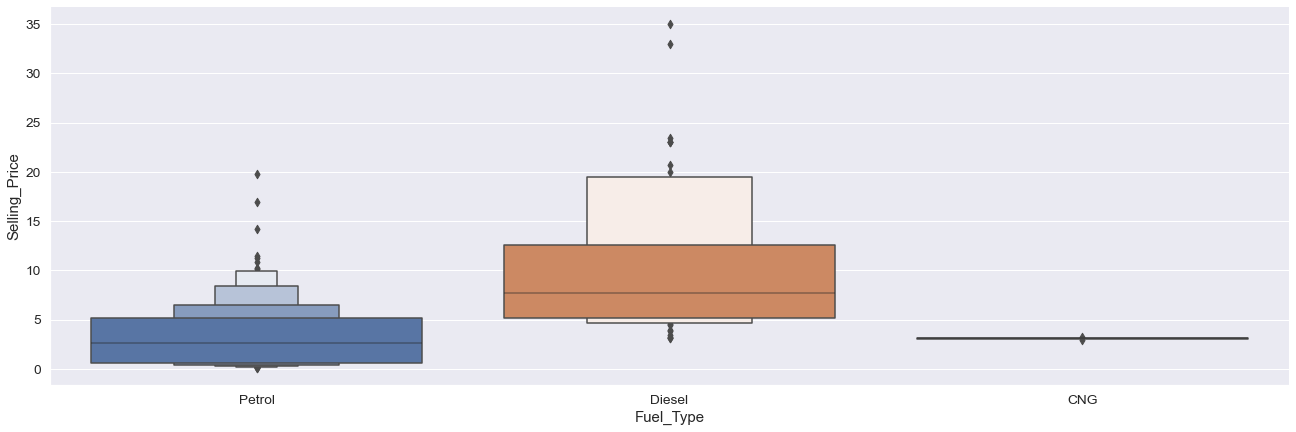

In [67]:
# Visiualize Fuel_Type  with respect to Selling Price
sns.catplot(y='Selling_Price',x='Fuel_Type',data= datacar.sort_values('Fuel_Type',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

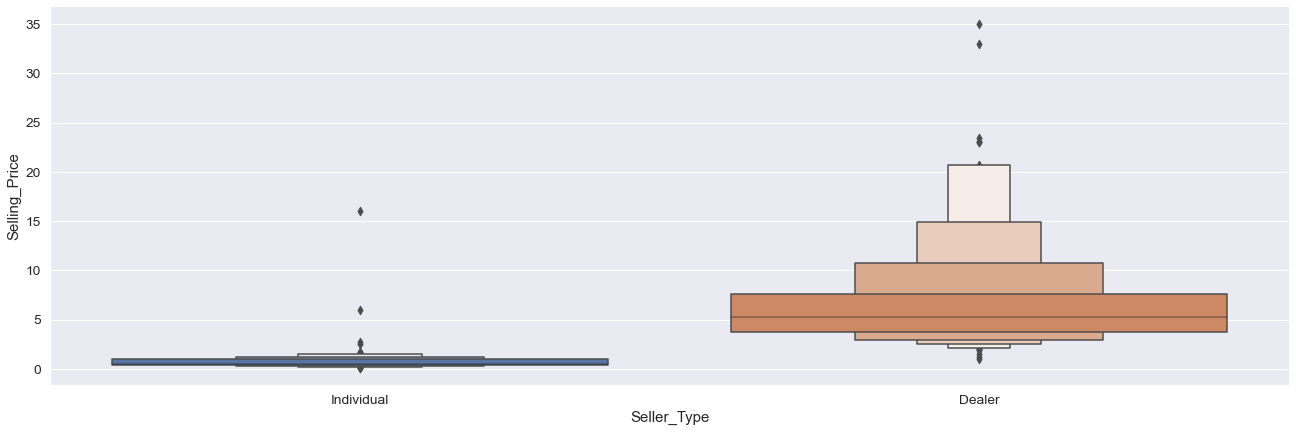

In [69]:
# Visiualize Fuel_Type  with respect to Selling Price
sns.catplot(y='Selling_Price',x='Seller_Type',data= datacar.sort_values('Seller_Type',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

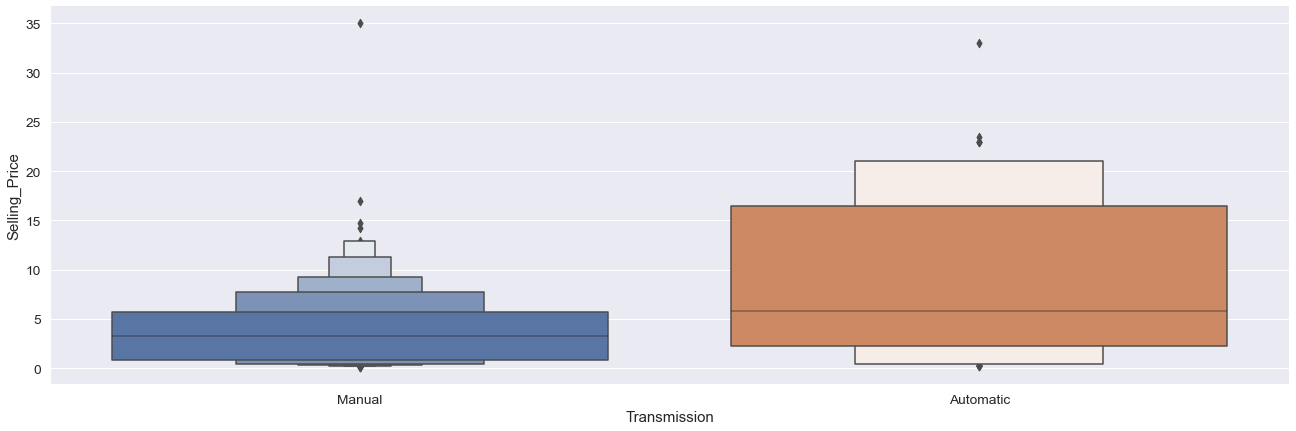

In [70]:
# Visiualize Fuel_Type  with respect to Selling Price
sns.catplot(y='Selling_Price',x='Transmission',data= datacar.sort_values('Transmission',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

#### Visiualizing quantitative Data

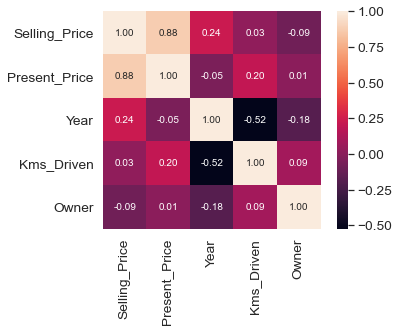

In [10]:
#checking association between Selling_Price and other numerical variables
corr = datacar.corr()
#correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'Selling_Price')['Selling_Price'].index
cm = np.corrcoef(datacar[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

There is a strong correlation between Selling_Price and Present_Price.

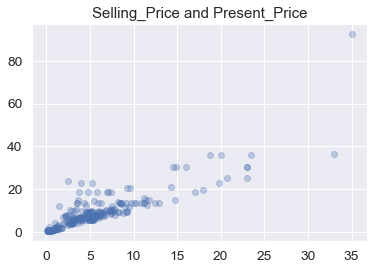

In [11]:
#checking association between Selling_Price and Present_Price variables
plt.scatter(datacar["Selling_Price"],datacar["Present_Price"], alpha=0.3)
plt.title('Selling_Price and Present_Price');

There is a strong correlation between Selling_Price and Present_Price.

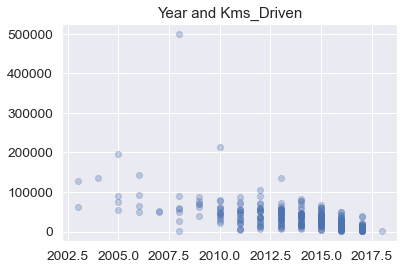

In [12]:
#cheking association between Year and Kms_Driven variables
plt.scatter(datacar["Year"],datacar["Kms_Driven"], alpha=0.3)
plt.title('Year and Kms_Driven');

There is No correlation between Year and Kms Driven

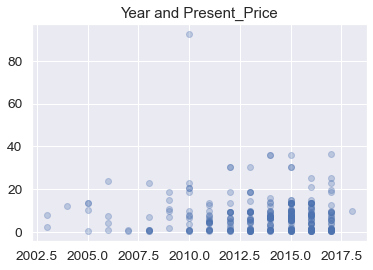

In [13]:
#cheking association between Year and Present_Price variables
plt.scatter(datacar["Year"],datacar["Present_Price"], alpha=0.3)
plt.title('Year and Present_Price');

There is No correlation between Year and Present_Price

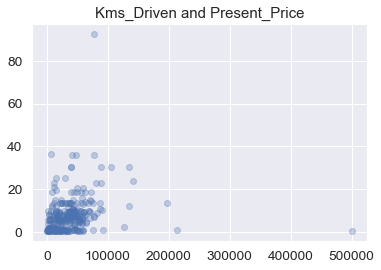

In [14]:
#cheking association between Kms_Driven and Present_Price variables
plt.scatter(datacar["Kms_Driven"],datacar["Present_Price"], alpha=0.3)
plt.title('Kms_Driven and Present_Price');

There is No correlation between Kms_Driven and Present_Price

In [15]:
#Encoding the categorical variables
#Convert test to numerical values
datacar.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}},inplace=True)
datacar.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
datacar.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [16]:
datacar.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### 2. Feature Engeniering

In [17]:
#splitting the data into training data and test data.
X = datacar.drop(["Car_Name","Selling_Price"], axis = 1)
y = datacar["Selling_Price"]
print(X)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=2)

In [19]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif_sorted = vif.sort_values(by="VIF Factor", ascending=False)
vif_sorted.head(7)

,VIF Factor,features
0,4.427574,Year
1,3.164007,Present_Price
4,2.229093,Seller_Type
2,2.042232,Kms_Driven
3,1.620168,Fuel_Type
5,1.361930,Transmission
6,1.065787,Owner


Based on these factors, we have little worries for multicolliniearity.

### 3. Building Models

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

#### 3.1 Linear Regression Model

In [21]:
#loading Linear regression model
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

##### Model Evaluation with training data

In [22]:
#prediction on training data
lr_predt = lin_reg.predict(X_train)

In [23]:
#R_spuared Error. Need to compare the value predicted with original value
error_score = metrics.r2_score(y_train, lr_predt)
print("R square Error:", error_score)

R square Error: 0.8799451660493698


<function matplotlib.pyplot.show(close=None, block=None)>

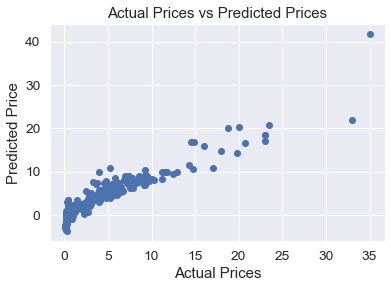

In [24]:
#visiualize actual prices and predicted prices
plt.scatter(y_train, lr_predt)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show

#### Model Evaluation with test data

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, prediction):
    mae = mean_absolute_error(y, prediction)
    mse = mean_squared_error(y, prediction)
    rmse = np.sqrt(mean_squared_error(y, prediction))
    r_squared = r2_score(y, prediction)
    return mae, mse, rmse, r_squared

In [26]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [27]:
#prediction on test data
lr_pred = lin_reg.predict(X_test)

In [28]:
#R_spuared Error. Need to compare the value predicted with original value
mae, mse, rmse, r_squared = evaluation(y_test, lr_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1.1516382156614553
MSE: 2.1501299189838208
RMSE: 1.466332131198052
R2 Score: 0.8365766715026905
------------------------------
RMSE Cross-Validation: 2.084435281004424


<function matplotlib.pyplot.show(close=None, block=None)>

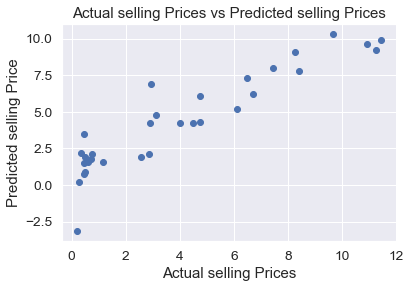

In [29]:
#visiualize actual prices and predicted prices
plt.scatter(y_test, lr_pred)
plt.xlabel("Actual selling Prices")
plt.ylabel("Predicted selling Price")
plt.title("Actual selling Prices vs Predicted selling Prices")
plt.show

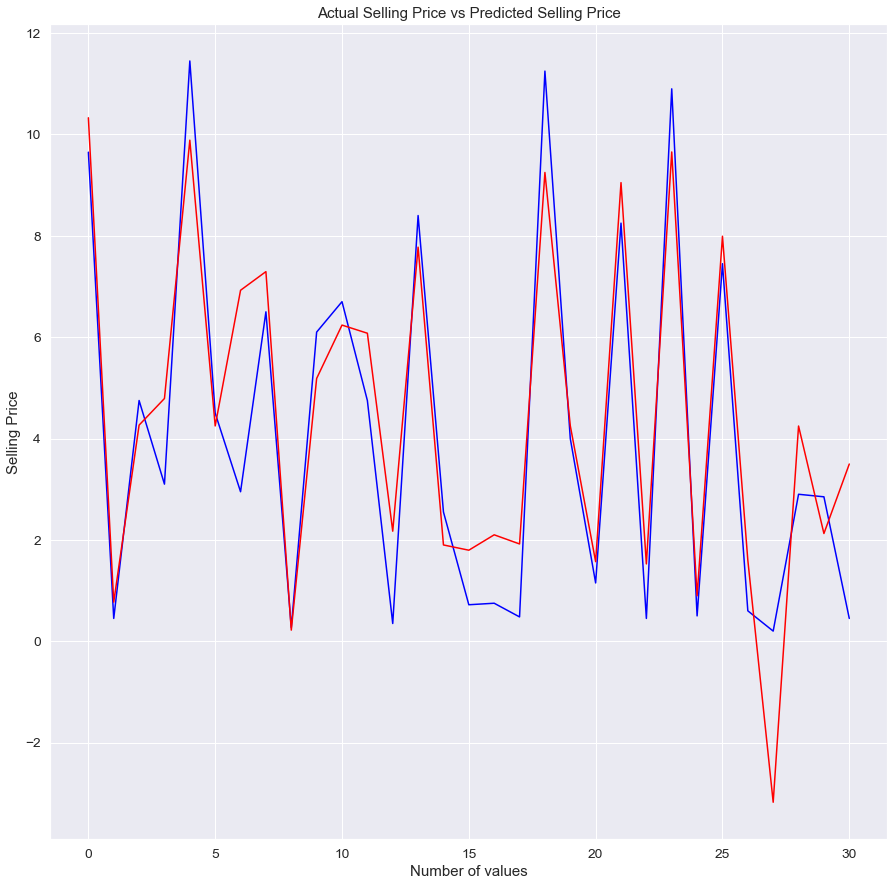

In [30]:
#Comparing actual and predicted values in a plot
y_test = list(y_test)
plt.figure(figsize=(15,15))
plt.plot(y_test, color="blue", label = "Actual Selling Price")
plt.plot(lr_pred, color="red", label = "Predicted Selling Price")
plt.title('Actual Selling Price vs Predicted Selling Price')
plt.xlabel('Number of values')
plt.ylabel('Selling Price')
plt.show()

#### 3.2 Lasso Regression Model

In [31]:
#loading Lasso regression model
lass_reg= Lasso()
lass_reg.fit(X_train, y_train)

Lasso()

##### Model Evaluation with training data


In [32]:
#prediction on training data
lass_reg_predt = lass_reg.predict(X_train)

In [33]:
#R_spuared Error. Need to compare the value predicted with original value
error_score = metrics.r2_score(y_train, lass_reg_predt)
print("R square Error:", error_score)

R square Error: 0.8427856123435794


<function matplotlib.pyplot.show(close=None, block=None)>

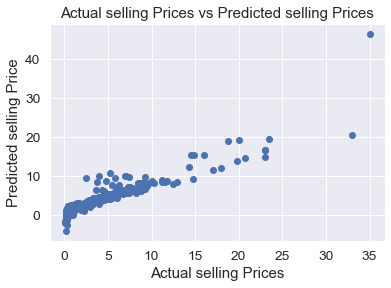

In [34]:
#visiualize actual prices and predicted prices
plt.scatter(y_train, lass_reg_predt)
plt.xlabel("Actual selling Prices")
plt.ylabel("Predicted selling Price")
plt.title("Actual selling Prices vs Predicted selling Prices")
plt.show

##### Model Evaluation with test data

In [35]:
lass_reg_pred = lass_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, lass_reg_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lass_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LassoRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1.0507413774170433
MSE: 1.6983234006965484
RMSE: 1.3031973759552113
R2 Score: 0.8709167941173195
------------------------------
RMSE Cross-Validation: 2.1243955278167967


<function matplotlib.pyplot.show(close=None, block=None)>

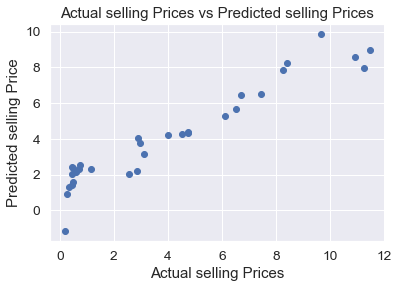

In [36]:
#visiualize actual prices and predicted prices
plt.scatter(y_test, lass_reg_pred)
plt.xlabel("Actual selling Prices")
plt.ylabel("Predicted selling Price")
plt.title("Actual selling Prices vs Predicted selling Prices")
plt.show

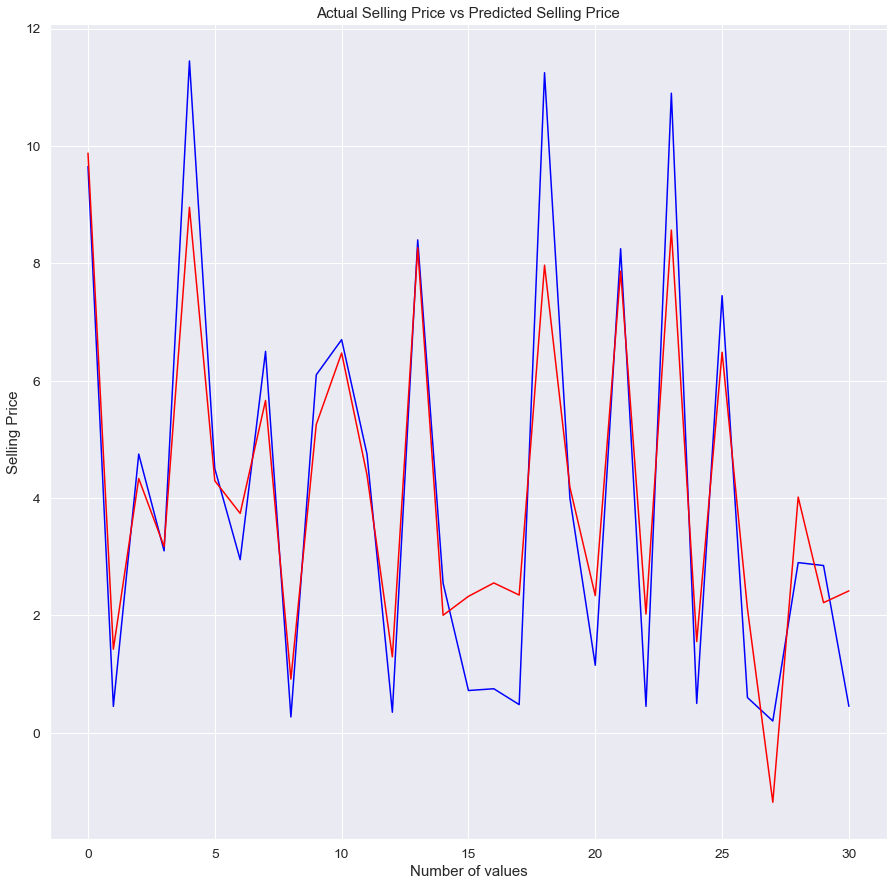

In [37]:
#Comparing actual and predicted values in a plot
y_test = list(y_test)
plt.figure(figsize=(15,15))
plt.plot(y_test, color="blue", label = "Actual Selling Price")
plt.plot(lass_reg_pred, color="red", label = "Predicted Selling Price")
plt.title('Actual Selling Price vs Predicted Selling Price')
plt.xlabel('Number of values')
plt.ylabel('Selling Price')
plt.show()

#### 3.3 Ridge Model

In [50]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, ridge_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1.143061531347623
MSE: 2.1038056480123
RMSE: 1.4504501535772611
R2 Score: 0.8400976059753177
------------------------------
RMSE Cross-Validation: 2.073952716065565


<function matplotlib.pyplot.show(close=None, block=None)>

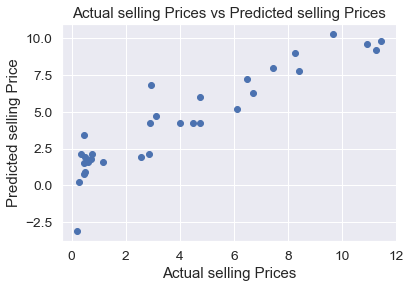

In [39]:
#visiualize actual prices and predicted prices
plt.scatter(y_test, ridge_pred)
plt.xlabel("Actual selling Prices")
plt.ylabel("Predicted selling Price")
plt.title("Actual selling Prices vs Predicted selling Prices")
plt.show

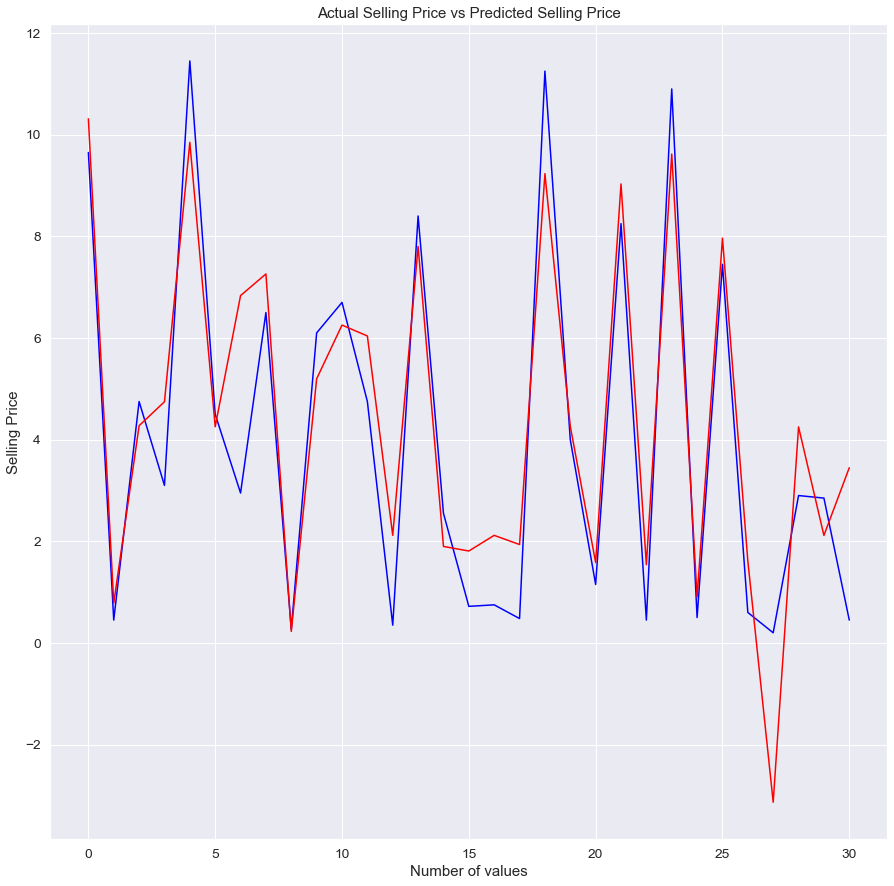

In [40]:
#Comparing actual and predicted values in a plot
y_test = list(y_test)
plt.figure(figsize=(15,15))
plt.plot(y_test, color="blue", label = "Actual Selling Price")
plt.plot(ridge_pred, color="red", label = "Predicted Selling Price")
plt.title('Actual Selling Price vs Predicted Selling Price')
plt.xlabel('Number of values')
plt.ylabel('Selling Price')
plt.show()

#### 3.4 Quadratic Polynomial Regression Model

In [41]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.fit_transform(X_test)
lin_reg = LinearRegression()
poly_reg.fit(X_train_2d, y_train)
lin_reg.fit(X_train_2d, y_train)
poly_pred = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, poly_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(poly_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Quadratic Polynomial Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.5346755157539905
MSE: 0.42030106827346214
RMSE: 0.6483063074453789
R2 Score: 0.9680544887349475
------------------------------
RMSE Cross-Validation: nan


<function matplotlib.pyplot.show(close=None, block=None)>

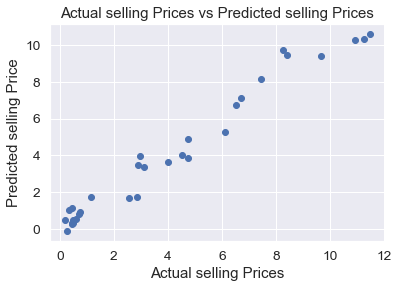

In [42]:
#visiualize actual prices and predicted prices
plt.scatter(y_test, poly_pred)
plt.xlabel("Actual selling Prices")
plt.ylabel("Predicted selling Price")
plt.title("Actual selling Prices vs Predicted selling Prices")
plt.show

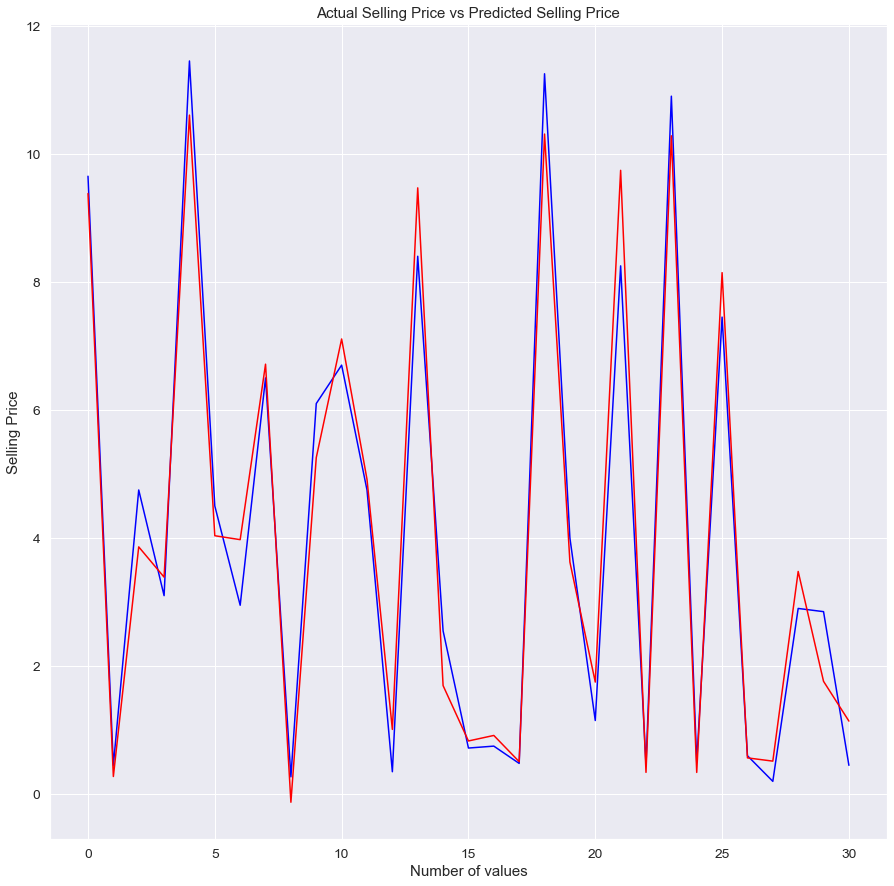

In [43]:
#Comparing actual and predicted values in a plot
y_test = list(y_test)
plt.figure(figsize=(15,15))
plt.plot(y_test, color="blue", label = "Actual Selling Price")
plt.plot(poly_pred, color="red", label = "Predicted Selling Price")
plt.title('Actual Selling Price vs Predicted Selling Price')
plt.xlabel('Number of values')
plt.ylabel('Selling Price')
plt.show()

#### 3.5 ElasticNet Model

In [44]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
elastic_pred = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, elastic_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1.050615467446401
MSE: 1.71685311393429
RMSE: 1.3102874165366505
R2 Score: 0.8695084199597042
------------------------------
RMSE Cross-Validation: 2.078030001055321


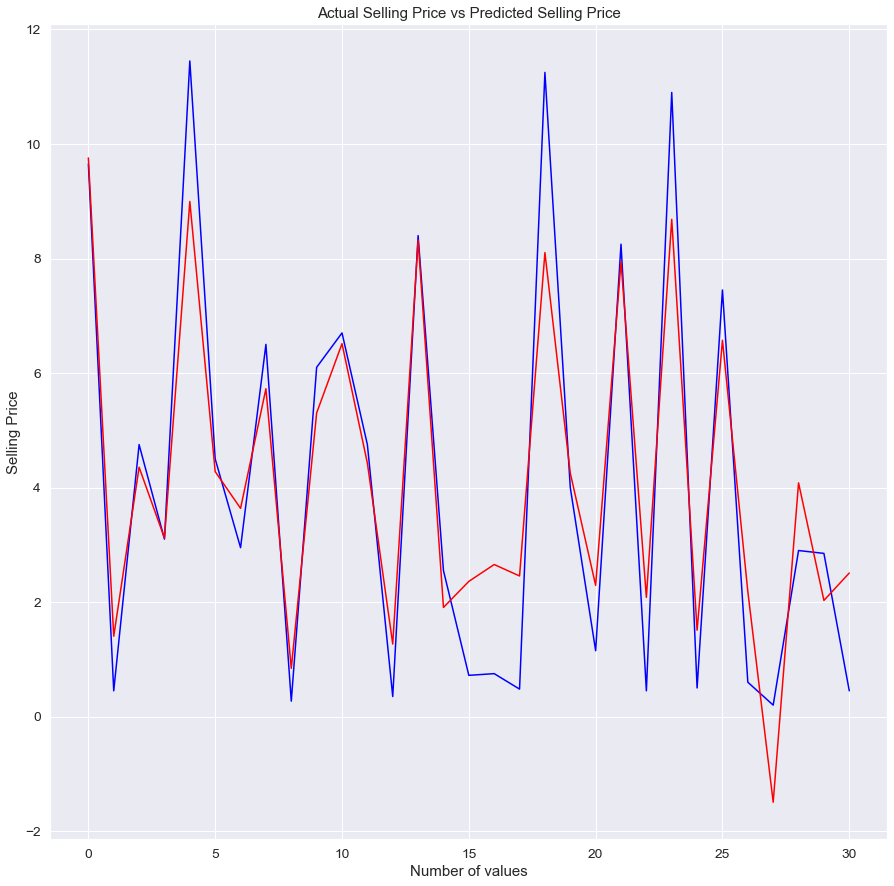

In [45]:
#Comparing actual and predicted values in a plot
y_test = list(y_test)
plt.figure(figsize=(15,15))
plt.plot(y_test, color="blue", label = "Actual Selling Price")
plt.plot(elastic_pred, color="red", label = "Predicted Selling Price")
plt.title('Actual Selling Price vs Predicted Selling Price')
plt.xlabel('Number of values')
plt.ylabel('Selling Price')
plt.show()

#### 3.6 Random Forest Regression Model

In [46]:

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)
reg_pred = regressor.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, reg_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(regressor)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Random Forest Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.3373000000000001
MSE: 0.2523478035483873
RMSE: 0.502342317098995
R2 Score: 0.9808199878385242
------------------------------
RMSE Cross-Validation: 1.4000071833522056


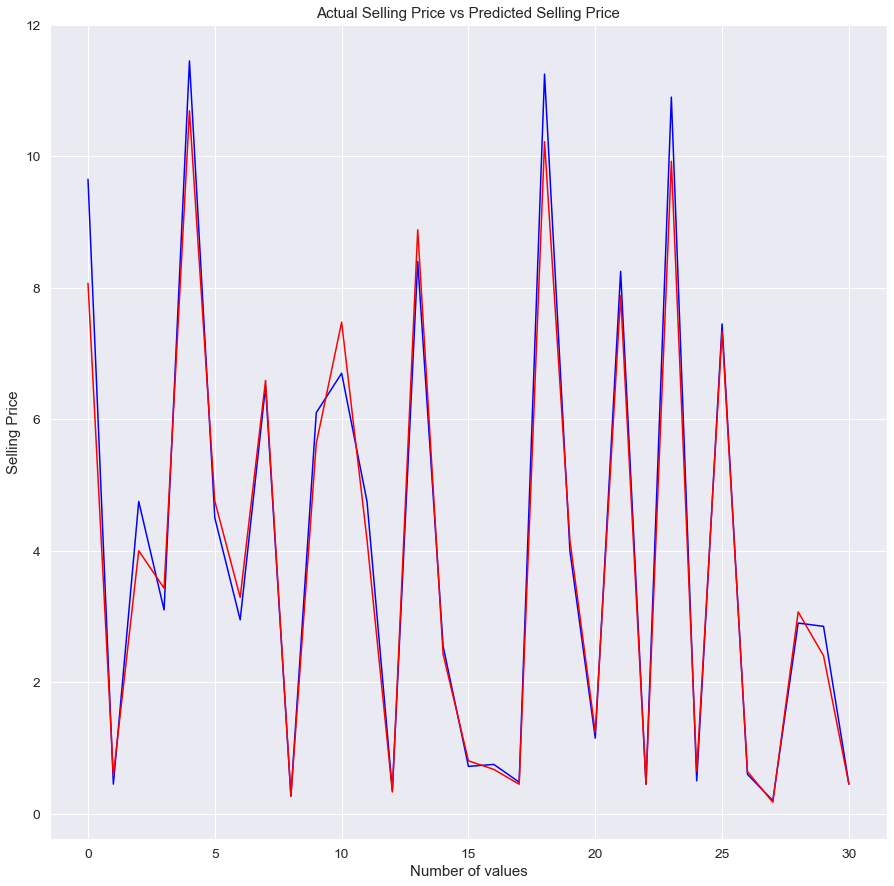

In [47]:
#Comparing actual and predicted values in a plot
y_test = list(y_test)
plt.figure(figsize=(15,15))
plt.plot(y_test, color="blue", label = "Actual Selling Price")
plt.plot(reg_pred, color="red", label = "Predicted Selling Price")
plt.title('Actual Selling Price vs Predicted Selling Price')
plt.xlabel('Number of values')
plt.ylabel('Selling Price')
plt.show()

In [48]:
models.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,Random Forest Regression,0.337300,0.252348,0.502342,0.980820,1.400007
3,Quadratic Polynomial Regression,0.534676,0.420301,0.648306,0.968054,NaN
1,LassoRegression,1.050741,1.698323,1.303197,0.870917,2.124396
4,ElasticNet,1.050615,1.716853,1.310287,0.869508,2.078030
2,Ridge,1.143062,2.103806,1.450450,0.840098,2.073953
0,LinearRegression,1.151638,2.150130,1.466332,0.836577,2.084435


# Conclusion: All models perform well, with the Random Forest Regressor Model being the best.

In [103]:
data_no_index =  datacar.reset_index(drop=True) #To remove index column
dt = data_no_index.drop(["Car_Name","Selling_Price"], axis = 1)
Input_r_data = dt.sample(1)
datacar.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}},inplace=True)
datacar.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
datacar.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)
Input_data = Input_r_data
#changing to numpy array
Input_data = np.asarray(Input_data)
#reshape the array as we are predicting for one instance
std_data=Input_data.reshape(1,-1)
#Standardize the input data
#std_data = scaler.transform(Input_data)
print(Input_r_data)
prediction =regressor.predict(std_data)
print("The selling Price is this car is:", prediction, "thousand.")



     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
240  2012            9.4       32322          1            0             0   

     Owner  
240      0  
The selling Price is this car is: [5.0495] thousand.
